### OOM probe results:

* OOM_probe.py returns a table in csv form that records the memory usage at each stage e.g. after data creation, at xx epochs

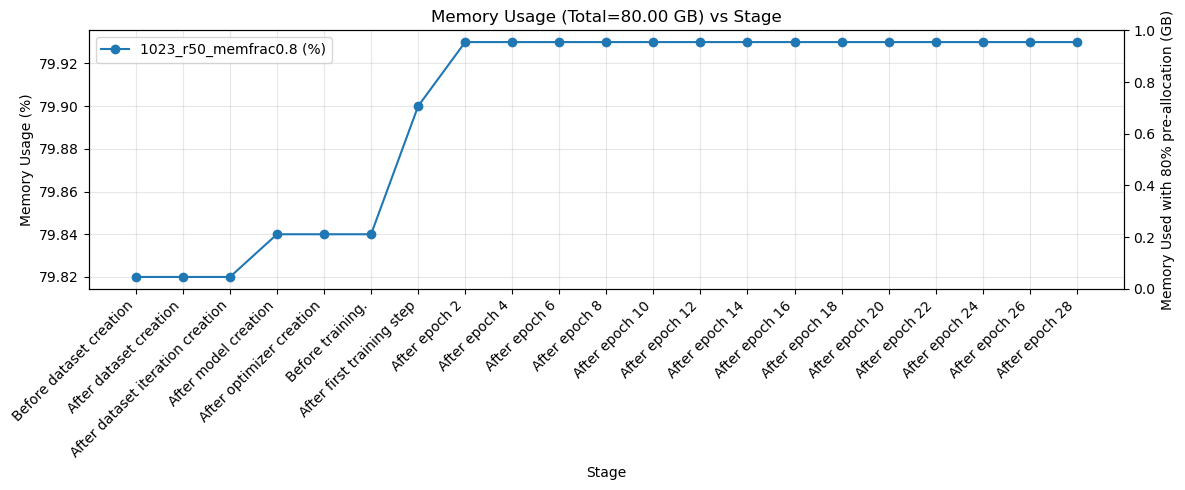

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Pick your CSVs here (label -> path)
csv_map = {
    #"511_r3": Path(f"/Scratch/cindy/testing/Skyclean/skyclean/data/ML/oom_mem_logs/mem_lmax{511}_r{3}_bs{1}_chs1-16-32-32-64.csv"),
    #"511_r4": Path(f"/Scratch/cindy/testing/Skyclean/skyclean/data/ML/oom_mem_logs/mem_lmax{511}_r{4}_bs{1}_chs1-16-32-32-64.csv"),
    #"767_r100": Path(f"/Scratch/cindy/testing/Skyclean/skyclean/data/ML/oom_mem_logs/mem_lmax{767}_r{100}_bs{5}_chs1-16-32-32-64.csv"),
    "1023_r50_memfrac0.8": Path(f"/Scratch/cindy/testing/Skyclean/skyclean/data/ML/oom_mem_logs/mem_lmax{1023}_r{50}_bs{5}_chs1-16-32-32-64_memfrac0.8.csv"),
    #"1023_r50_memfrac0.0": Path(f"/Scratch/cindy/testing/Skyclean/skyclean/data/ML/oom_mem_logs/mem_lmax{1023}_r{50}_bs{5}_chs1-16-32-32-64_memfrac0.csv"),
}

# Column names in CSV 
stage = "stage" 
percent = "percent"         
gb_used = "gb_used"  
gb_total = "gb_total"
delta_gb = "delta_gb"
delta_from_start_gb = "delta_from_start_gb"

fig, ax = plt.subplots(figsize=(12, 5))
ax_right = ax.twinx()  # second y-axis on the right

for label, csv_path in csv_map.items():
    # for 767 one, only load first 100 stages 
    df = pd.read_csv(csv_path)
    import re
    def keep_row(row):
        s = str(row[stage])
        m = re.search(r"epoch\s+(\d+)", s, re.IGNORECASE)
        if not m:
            return True  # keep non-epoch stages
        epoch = int(m.group(1))
        return epoch % 2 == 0  # keep every 5th epoch
    df = df[df.apply(keep_row, axis=1)]
    df = df.iloc[:-1]

    x = df[stage].astype(str)
    y = df[percent]
    ax.plot(x, df[percent], marker="o", label=f"{label} (%)") # Left axis: percent
    #ax_right.plot(x, df[delta_from_start_gb], marker="s", linestyle="--", label=f"{label} (GB)") # Right axis: GB used since start


ax.set_xlabel("Stage")
ax.set_ylabel("Memory Usage (%)")
ax.set_title(f"Memory Usage (Total={df[gb_total].iloc[-1]:.2f} GB) vs Stage")
ax_right.set_ylabel("Memory Used with 80% pre-allocation (GB)")
ax.grid(True, alpha=0.3)
lines_l, labels_l = ax.get_legend_handles_labels()
lines_r, labels_r = ax_right.get_legend_handles_labels()
ax.legend(lines_l + lines_r, labels_l + labels_r, loc="upper left")
fig.canvas.draw()
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
#plt.savefig("oom_mem/oom_767.png", dpi=300)
plt.show()


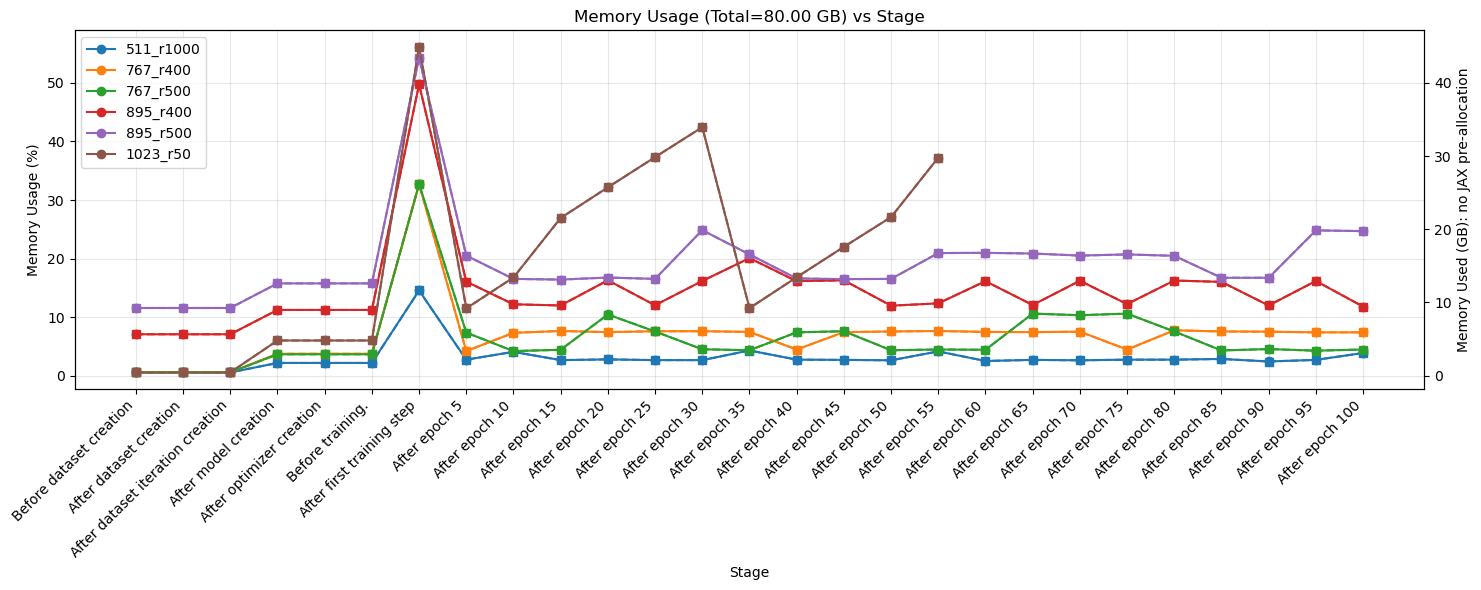

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Pick your CSVs here (label -> path)
csv_map = {
    "511_r1000": Path(f"/Scratch/cindy/testing/Skyclean/skyclean/data/ML/oom_mem_logs/mem_lmax{511}_r{1000}_bs{5}_chs1-16-32-32-64_memfrac0.csv"),
    "767_r400": Path(f"/Scratch/cindy/testing/Skyclean/skyclean/data/ML/oom_mem_logs/mem_lmax{767}_r{400}_bs{5}_chs1-16-32-32-64_memfrac0.csv"),
    "767_r500": Path(f"/Scratch/cindy/testing/Skyclean/skyclean/data/ML/oom_mem_logs/mem_lmax{767}_r{500}_bs{5}_chs1-16-32-32-64_memfrac0.csv"),
    "895_r400": Path(f"/Scratch/cindy/testing/Skyclean/skyclean/data/ML/oom_mem_logs/mem_lmax{895}_r{400}_bs{5}_chs1-16-32-32-64_memfrac0.csv"),
    "895_r500": Path(f"/Scratch/cindy/testing/Skyclean/skyclean/data/ML/oom_mem_logs/mem_lmax{895}_r{500}_bs{5}_chs1-16-32-32-64_memfrac0.csv"),
    "1023_r50": Path(f"/Scratch/cindy/testing/Skyclean/skyclean/data/ML/oom_mem_logs/mem_lmax{1023}_r{50}_bs{5}_chs1-16-32-32-64_memfrac0.csv"),
}

# Column names in CSV 
stage = "stage" 
percent = "percent"         
gb_used = "gb_used"  
gb_total = "gb_total"
delta_gb = "delta_gb"
delta_from_start_gb = "delta_from_start_gb"

fig, ax = plt.subplots(figsize=(15, 6))
ax_right = ax.twinx()  # second y-axis on the right

for label, csv_path in csv_map.items():
    # for 767 one, only load first 100 stages 
    df = pd.read_csv(csv_path)
    import re
    def keep_row(row):
        s = str(row[stage])
        m = re.search(r"epoch\s+(\d+)", s, re.IGNORECASE)
        if not m:
            return True  # keep non-epoch stages
        epoch = int(m.group(1))
        return epoch % 5 == 0  # keep every 5th epoch
    df = df[df.apply(keep_row, axis=1)]
    df = df.iloc[:-1]

    x = df[stage].astype(str)
    y = df[percent]
    ax.plot(x, df[percent], marker="o", label=f"{label}") # Left axis: percent
    ax_right.plot(x, df[gb_used], marker="s", linestyle="--",) # Right axis: GB used since start: label=f"{label} (GB)"


ax.set_xlabel("Stage")
ax.set_ylabel("Memory Usage (%)")
ax.set_title(f"Memory Usage (Total={df[gb_total].iloc[-1]:.2f} GB) vs Stage")
ax_right.set_ylabel("Memory Used (GB): no JAX pre-allocation")
ax.grid(True, alpha=0.3)
lines_l, labels_l = ax.get_legend_handles_labels()
lines_r, labels_r = ax_right.get_legend_handles_labels()
ax.legend(lines_l + lines_r, labels_l + labels_r, loc="upper left")
fig.canvas.draw()
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
#plt.savefig("oom_mem/oom_895.png", dpi=300)
plt.show()
